In [184]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

import tensorflow.keras.losses as losses

In [185]:
dataPhishing = pd.read_csv('C:/Users/LEHI/Documents/Practicas profesionales/ABRIL/preprocessed data-phishing.csv')

In [186]:
#Seleccion de elementos por clase
df_uniq = dataPhishing.groupby('phishing').head(100)

In [187]:
#Vizualizar los datos seleccionados
#df_uniq

In [188]:
def eliminar_columnas(data, columnas_a_eliminar):
    dataSC= df_uniq.copy()
    dataSC=df_uniq.drop(columns=columnas_a_eliminar, errors='ignore')
    return dataSC

In [189]:
columnasE=[
'qty_hyphen_ur',
'qty_underline_url',
'qty_questionmark_url',
'qty_equal_url',
'qty_at_url',
'qty_and_url',
'qty_exclamation_url',
'qty_space_url',
'qty_tilde_url',
'qty_comma_url',
'qty_plus_url',
'qty_asterisk_url',
'qty_hashtag_url',
'qty_dollar_url',
'qty_percent_url',
'qty_hyphen_domain',
'qty_underline_domain',
'qty_at_domain',
'domain_in_ip',
'server_client_domain',
'qty_dot_directory',
'qty_hyphen_directory',
'qty_underline_directory',
'qty_questionmark_directory',
'qty_percent_directory',
'qty_hyphen_file',
'file_length',
'email_in_url',
'domain_spf',
'qty_mx_servers',
'tls_ssl_certificate',
'qty_redirects',
'url_google_index',
'domain_google_index',
'url_shortened'
]

In [190]:
dataLimpiaP=eliminar_columnas(df_uniq,columnasE)

In [191]:
#dataLimpiaP

In [192]:
# Dividir los datos en características (X) y etiquetas (y)
X = dataLimpiaP.drop('phishing', axis=1)
y = dataLimpiaP['phishing']

In [193]:
# Convertir etiquetas a números
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [194]:
# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos (opcional pero recomendado)
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_test.mean()) / X_test.std()

In [195]:
# Definir la arquitectura de la red siamesa
input_shape = X_train.shape[1]

In [196]:
# Definir función para crear la rama de la red siamesa
def create_siamese_branch(input_shape):
    input_layer = tf.keras.layers.Input(shape=(input_shape,))
    x = tf.keras.layers.Dense(64, activation='relu')(input_layer)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.Dense(32, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    return tf.keras.Model(inputs=input_layer, outputs=x)

In [197]:
# Crear la rama izquierda y derecha de la red siamesa
left_input = tf.keras.layers.Input(shape=(input_shape,))
right_input = tf.keras.layers.Input(shape=(input_shape,))

left_branch = create_siamese_branch(input_shape)(left_input)
right_branch = create_siamese_branch(input_shape)(right_input)

In [198]:
# Concatenar las salidas de ambas ramas
merged = tf.keras.layers.Concatenate()([left_branch, right_branch])

In [199]:
# Agregar capas adicionales y la capa de salida
x = tf.keras.layers.Dense(32, activation='relu')(merged)
x = tf.keras.layers.Dropout(0.2)(x)
output = tf.keras.layers.Dense(2, activation='sigmoid')(x)  

In [200]:
# Construir el modelo
model = tf.keras.Model(inputs=[left_input, right_input], outputs=output)

In [201]:
# Compilar el modelo
model.compile(optimizer='adam', loss=losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])


In [202]:
# Entrenar el modelo
history = model.fit([X_train, X_train], y_train, epochs=20, batch_size=16, validation_split=0.2)

Epoch 1/20
8/8 [==============================] - 1s 35ms/step - loss: 0.6390 - accuracy: 0.5859 - val_loss: 0.5694 - val_accuracy: 0.8125
Epoch 2/20
8/8 [==============================] - 0s 5ms/step - loss: 0.5828 - accuracy: 0.7266 - val_loss: 0.5069 - val_accuracy: 0.8125
Epoch 3/20
8/8 [==============================] - 0s 6ms/step - loss: 0.5190 - accuracy: 0.7734 - val_loss: 0.4508 - val_accuracy: 0.8438
Epoch 4/20
8/8 [==============================] - 0s 6ms/step - loss: 0.4742 - accuracy: 0.7891 - val_loss: 0.4014 - val_accuracy: 0.8750
Epoch 5/20
8/8 [==============================] - 0s 6ms/step - loss: 0.3991 - accuracy: 0.8438 - val_loss: 0.3575 - val_accuracy: 0.8750
Epoch 6/20
8/8 [==============================] - 0s 6ms/step - loss: 0.3649 - accuracy: 0.8594 - val_loss: 0.3120 - val_accuracy: 0.9062
Epoch 7/20
8/8 [==============================] - 0s 5ms/step - loss: 0.3521 - accuracy: 0.8281 - val_loss: 0.2768 - val_accuracy: 0.9062
Epoch 8/20
8/8 [=================

In [203]:
# Cargar datos desde CSV
dataPhishing = pd.read_csv('C:/Users/LEHI/Documents/Practicas profesionales/ABRIL/preprocessed data-phishing.csv')

In [204]:
#Cuando se vuelve a cargar el dataset se deben eliminar las columnas que se eliminaron en la fase de entrenamiento
dataLimpiaP=eliminar_columnas(dataPhishing,columnasE)

In [205]:
# Dividir los datos en características (X) y etiquetas (y)
X = dataLimpiaP.drop('phishing', axis=1)
y = dataLimpiaP['phishing']

In [206]:
# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Normalizar los datos (opcional pero recomendado)
X_test = (X_test - X_test.mean()) / X_test.std()


In [207]:
# Evaluar el modelo
y_pred = model.predict([X_test, X_test])
y_pred_classes = np.argmax(y_pred, axis=1)

2/2 [==============================] - 0s 2ms/step


In [208]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Matriz de Confusión:")
print(conf_matrix)

Matriz de Confusión:
[[17  2]
 [ 2 19]]


In [209]:
#Metricas

with np.errstate(divide='ignore', invalid='ignore'):
    # Exactitud (Accuracy)
    accuracy = np.sum(np.diag(conf_matrix)) / np.sum(conf_matrix)
    print("Exactitud (Accuracy):\n", accuracy)

    # Precisión (Precision)
    precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
    precision[np.isnan(precision)] = 0  # Reemplaza NaN con 0
    print("Precisión (Precision) por clase:\n", precision)

    # Sensibilidad (Recall)
    sensibilidad = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
    sensibilidad[np.isnan(sensibilidad)] = 0  # Reemplaza NaN con 0
    print("Sensibilidad (Recall) por clase:\n", sensibilidad)

    # Puntuación F1 (F1 Score)
    f1_score = 2 * (precision * sensibilidad) / (precision + sensibilidad)
    f1_score[np.isnan(f1_score)] = 0  # Reemplaza NaN con 0
    print("Puntuación F1 (F1 Score) por clase:\n", f1_score)

Exactitud (Accuracy):
 0.9
Precisión (Precision) por clase:
 [0.89473684 0.9047619 ]
Sensibilidad (Recall) por clase:
 [0.89473684 0.9047619 ]
Puntuación F1 (F1 Score) por clase:
 [0.89473684 0.9047619 ]


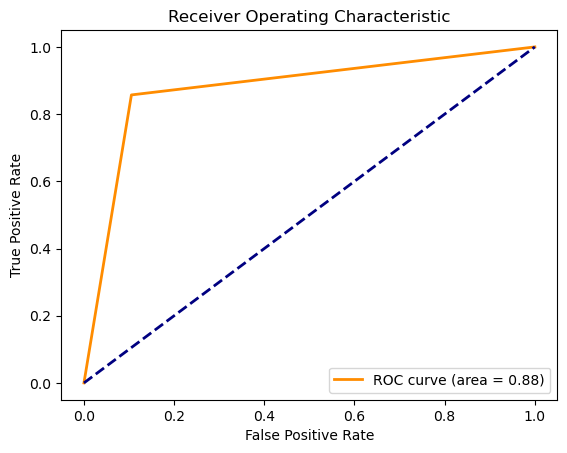

In [183]:
# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_classes)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()